# Project: Investigating the UAE's Oil Production and its Impact on Quality of Life Indicators

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


I currently live and work in the United Arab Emirates. The country's development and success is widely believed to be tied to it investing its vast oil wealth to develop  a glitzy tourism industry, a major global financial hub that bridges Asia and the west, and one of the largest international transport hubs for all major continents. 

This project will examine how oil production in the UAE may relate to increases or decreases in the following indicators that are often used to determine the relative progress of a country towards having an advanced economy and society. I will examine the following indicators while keeping in mind the added caveats:

Annual Population Growth: Approximately 90% of UAE residents are foreigners, mass population changes would likely be caused by economic externalaties that force expats to leave, though greater population growth could also indicate increases in immigration

GDP as Income Per Person (PPP): Income is untaxed and closely tied to foreign passport a resident holds, demographic changes immigration and emmigration likely impact this metric, but are not available in the data.

Life Expectancy: May be skewed by large expat communities whose life expectancy would be tied to the living standards of their home countries

*Data measures include UAE residents and citizens

Questions:
1. Does oil production correlate positively or negatively with the other metrics examined? What might these correlations indicate?
2. What, if any, correllations exist between independent variables and do they provide insights not found when
   comparing the independent and dependent variables
 

How are indicators measuresd?
1. Oil: Crude production per person (in tonnes oil equivalent)
2. Income: Income per person per year as a measure of GDP (adjusted for purchase power parity w/international USD)
3. Life Expectancy: average expected age based on mortality patterns at the time
4. Population: exponential rate of growth year over year, expressed as a percentage

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

population = pd.read_csv('annual_pop_growth.csv')
income = pd.read_csv('income_per_person_gdp.csv')
life = pd.read_csv('life_expectancy_years.csv')
oil = pd.read_csv('oil_production_per_person.csv')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

oil.info(), oil.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 53 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  49 non-null     object 
 1   1965     32 non-null     float64
 2   1966     33 non-null     float64
 3   1967     34 non-null     float64
 4   1968     35 non-null     float64
 5   1969     35 non-null     float64
 6   1970     35 non-null     float64
 7   1971     36 non-null     float64
 8   1972     37 non-null     float64
 9   1973     37 non-null     float64
 10  1974     37 non-null     float64
 11  1975     37 non-null     float64
 12  1976     37 non-null     float64
 13  1977     37 non-null     float64
 14  1978     37 non-null     float64
 15  1979     37 non-null     float64
 16  1980     37 non-null     float64
 17  1981     38 non-null     float64
 18  1982     38 non-null     float64
 19  1983     38 non-null     float64
 20  1984     38 non-null     float64
 21  1985     43 non-nu

(None,
 country     0
 1965       17
 1966       16
 1967       15
 1968       14
 1969       14
 1970       14
 1971       13
 1972       12
 1973       12
 1974       12
 1975       12
 1976       12
 1977       12
 1978       12
 1979       12
 1980       12
 1981       11
 1982       11
 1983       11
 1984       11
 1985        6
 1986        5
 1987        4
 1988        4
 1989        4
 1990        4
 1991        4
 1992        3
 1993        2
 1994        2
 1995        2
 1996        2
 1997        2
 1998        2
 1999        2
 2000        2
 2001        2
 2002        2
 2003        1
 2004        1
 2005        1
 2006        1
 2007        1
 2008        1
 2009        1
 2010        1
 2011        1
 2012        0
 2013        0
 2014        0
 2015        0
 2016        0
 dtype: int64)

Examining the oil data shows that there are some null values, and that values for oil produced are floats. 
Further inspection is needed to determine if data for the UAE contains null values.
Since the oil data is the independent variable, and the years included range from 1965-2016, the analysis for the rest of the data will need to be narrowed down to the same time period to remain consistent.

In [3]:
oil.iloc[42:43]
#For each dataset, we can isolate the UAE data row using .iloc. 

,country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
42,United Arab Emirates,90.8,109.0,109.0,132.0,142.0,157.0,192.0,190.0,178.0,...,23.1,20.5,16.5,16.1,17.4,17.4,18.3,18.3,19.2,19.7


In [4]:
#We can now create a function that tests the UAE rows for null values
def no_null(full_df):
    uae_df = full_df[full_df['country'] == 'United Arab Emirates']
    return uae_df.isnull().values.any()


In [19]:
no_null(oil)


False

In [20]:
tmp_oil = oil.iloc[42:43]

Since we can't see all the data in the UAE row above, we can run that row through our function to see if any columns contain null values. The function returns "False" meaning no null values are present. We can now do the same for all of the CSVs.

In [6]:
population.info(), population.isnull().sum()
# The population data also contains null values, so we need to check if the UAE row is also missing data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 60 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  193 non-null    object 
 1   1960     190 non-null    float64
 2   1961     191 non-null    float64
 3   1962     191 non-null    float64
 4   1963     191 non-null    float64
 5   1964     191 non-null    float64
 6   1965     191 non-null    float64
 7   1966     191 non-null    float64
 8   1967     191 non-null    float64
 9   1968     191 non-null    float64
 10  1969     191 non-null    float64
 11  1970     191 non-null    float64
 12  1971     191 non-null    float64
 13  1972     191 non-null    float64
 14  1973     191 non-null    float64
 15  1974     191 non-null    float64
 16  1975     191 non-null    float64
 17  1976     191 non-null    float64
 18  1977     191 non-null    float64
 19  1978     191 non-null    float64
 20  1979     191 non-null    float64
 21  1980     191 non

(None,
 country    0
 1960       3
 1961       2
 1962       2
 1963       2
 1964       2
 1965       2
 1966       2
 1967       2
 1968       2
 1969       2
 1970       2
 1971       2
 1972       2
 1973       2
 1974       2
 1975       2
 1976       2
 1977       2
 1978       2
 1979       2
 1980       2
 1981       2
 1982       2
 1983       2
 1984       2
 1985       2
 1986       2
 1987       2
 1988       2
 1989       2
 1990       1
 1991       1
 1992       1
 1993       1
 1994       1
 1995       1
 1996       0
 1997       0
 1998       0
 1999       0
 2000       0
 2001       0
 2002       0
 2003       0
 2004       0
 2005       0
 2006       0
 2007       0
 2008       0
 2009       0
 2010       0
 2011       0
 2012       1
 2013       1
 2014       1
 2015       1
 2016       1
 2017       1
 2018       1
 dtype: int64)

In [8]:
population.iloc[182:183]
# As previously mentioned, population data is expressed as a percentage. 
#This will likely require converting the decimals below to full percentages for graphing purposes.

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
182,United Arab Emirates,0.0582,0.0868,0.106,0.11,0.0982,0.0821,0.0653,0.0594,0.073,...,0.11,0.0769,0.0454,0.0215,0.00614,0.00177,0.00527,0.0105,0.0134,0.015


In [9]:
no_null(population)


False

In [21]:
tmp_pop = population.iloc[182:183]

The UAE population data also contains no null values, but it does contain some extra years that will need to be dropped.

In [10]:
income.info(10), income.isnull().sum()
#income.info() returned a list with no values, adding the 10 appears to have fixed it. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 242 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   country  object
 1   1800     int64 
 2   1801     int64 
 3   1802     int64 
 4   1803     int64 
 5   1804     int64 
 6   1805     int64 
 7   1806     int64 
 8   1807     int64 
 9   1808     int64 
 10  1809     int64 
 11  1810     int64 
 12  1811     int64 
 13  1812     int64 
 14  1813     int64 
 15  1814     int64 
 16  1815     int64 
 17  1816     int64 
 18  1817     int64 
 19  1818     int64 
 20  1819     int64 
 21  1820     int64 
 22  1821     int64 
 23  1822     int64 
 24  1823     int64 
 25  1824     int64 
 26  1825     int64 
 27  1826     int64 
 28  1827     int64 
 29  1828     int64 
 30  1829     int64 
 31  1830     int64 
 32  1831     int64 
 33  1832     int64 
 34  1833     int64 
 35  1834     int64 
 36  1835     int64 
 37  1836     int64 
 38  1837     int64 
 39  1838     int64 
 40  1839   

(None,
 country    0
 1800       0
 1801       0
 1802       0
 1803       0
           ..
 2036       0
 2037       0
 2038       0
 2039       0
 2040       0
 Length: 242, dtype: int64)

In [11]:
income.iloc[182:183]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
182,United Arab Emirates,998,1000,1010,1010,1010,1020,1020,1020,1030,...,66800,68100,69400,70800,72200,73700,75200,76700,78300,79900


In [12]:
no_null(income)

False

In [22]:
tmp_inc = income.iloc[182:183]

UAE income data also appears to have no null values, though it does have a lot of extra years that will need to be dropped.The income data type is also different from the other UAE data, which are floats. We may need to change this data type to float as well for consistency.

In [13]:
life.info(10), life.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 302 columns):
 #   Column   Dtype  
---  ------   -----  
 0   country  object 
 1   1800     float64
 2   1801     float64
 3   1802     float64
 4   1803     float64
 5   1804     float64
 6   1805     float64
 7   1806     float64
 8   1807     float64
 9   1808     float64
 10  1809     float64
 11  1810     float64
 12  1811     float64
 13  1812     float64
 14  1813     float64
 15  1814     float64
 16  1815     float64
 17  1816     float64
 18  1817     float64
 19  1818     float64
 20  1819     float64
 21  1820     float64
 22  1821     float64
 23  1822     float64
 24  1823     float64
 25  1824     float64
 26  1825     float64
 27  1826     float64
 28  1827     float64
 29  1828     float64
 30  1829     float64
 31  1830     float64
 32  1831     float64
 33  1832     float64
 34  1833     float64
 35  1834     float64
 36  1835     float64
 37  1836     float64
 38  1837     

(None,
 country    0
 1800       3
 1801       3
 1802       3
 1803       3
           ..
 2096       3
 2097       3
 2098       3
 2099       3
 2100       3
 Length: 302, dtype: int64)

In [14]:
life.iloc[176:177]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
176,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.1,82.2,82.3,82.4,82.5,82.6,82.7,82.8,82.9,83.0


In [15]:
no_null(life)

False

In [23]:
tmp_life = life.iloc[176:177]

UAE life expectancy data also appears to contain no null values and will need to have its range of years adjusted

Since none of the UAE data is missing or errant, the cleaning process will require dropping years preceding 1965 and following 2016. This is likely a better option that appending these four datasets into a single dataframe and then filling non-overlapping values with null values. This should make the data easier to use inside Jupyter, or if it needs to be exported. If necessary, the income data will converted to a float for consistency. I will also append the four datasets together and restructure the dataframe so that it is easier to use. 


## Data Cleaning

Each csv is set up so that the column names include country and each year where data is present. 
This seems like a poor way to organize the data, especially once I merge all four datasets. 
In order to do fix this easily, I looked up how to stack the years into a single column, and ended up using .melt to do so. 

Once I have four new dataframes with stacked years, I will merge them so that the final dataframe only includes
all the data for the years that exist across all four original datasets. Since the oil data has the years I want, the merge should only include only the income, life expectancy, and population data for the years 1965-2016. 

In [25]:
uae_oil = tmp_oil.melt(id_vars=["country"], 
        var_name="Year", 
        value_name="oil_output_person")
uae_oil.head()


,country,Year,oil_output_person
0,United Arab Emirates,1965,90.8
1,United Arab Emirates,1966,109.0
2,United Arab Emirates,1967,109.0
3,United Arab Emirates,1968,132.0
4,United Arab Emirates,1969,142.0


In [26]:
uae_pop = tmp_pop.melt(id_vars=["country"], 
        var_name="Year", 
        value_name="pop_growth_percent")
uae_pop.head()

,country,Year,pop_growth_percent
0,United Arab Emirates,1960,0.0582
1,United Arab Emirates,1961,0.0868
2,United Arab Emirates,1962,0.1060
3,United Arab Emirates,1963,0.1100
4,United Arab Emirates,1964,0.0982


Since the population growth data is represented in decimals, they need to be converted to make more sense when graphed. I multiplied by 100 to get proper percentages and then replaced the original data in the uae_pop dataframe.

In [27]:
df_corrected_percent = uae_pop.pop_growth_percent*100
df_corrected_percent.head()

0     5.82
1     8.68
2    10.60
3    11.00
4     9.82
Name: pop_growth_percent, dtype: float64

In [28]:
uae_pop.pop_growth_percent = df_corrected_percent
uae_pop.head()

,country,Year,pop_growth_percent
0,United Arab Emirates,1960,5.82
1,United Arab Emirates,1961,8.68
2,United Arab Emirates,1962,10.60
3,United Arab Emirates,1963,11.00
4,United Arab Emirates,1964,9.82


In [29]:
uae_life = tmp_life.melt(id_vars=["country"], 
        var_name="Year", 
        value_name="life_expect")
uae_life.head()

,country,Year,life_expect
0,United Arab Emirates,1800,30.7
1,United Arab Emirates,1801,30.7
2,United Arab Emirates,1802,30.7
3,United Arab Emirates,1803,30.7
4,United Arab Emirates,1804,30.7


In [30]:
uae_inc = tmp_inc.melt(id_vars=["country"], 
        var_name="Year", 
        value_name="income_by_gdp")
uae_inc.head()

,country,Year,income_by_gdp
0,United Arab Emirates,1800,998
1,United Arab Emirates,1801,1000
2,United Arab Emirates,1802,1010
3,United Arab Emirates,1803,1010
4,United Arab Emirates,1804,1010


Now that I have the four dataframes that I need, I can merge them on the "Year" and "country" columns. This should merge all of that data only for years that are shared across all dataframes.

In [31]:
result = uae_inc.merge(uae_pop, on=['Year', 'country'])
result2 = result.merge(uae_oil, on=['Year', 'country'])
result3 = result2.merge(uae_life, on=['Year', 'country'])
uae_complete = result3
uae_complete.head()

,country,Year,income_by_gdp,pop_growth_percent,oil_output_person,life_expect
0,United Arab Emirates,1965,8290,8.21,90.8,59.3
1,United Arab Emirates,1966,14100,6.53,109.0,60.3
2,United Arab Emirates,1967,24000,5.94,109.0,61.3
3,United Arab Emirates,1968,28800,7.30,132.0,62.2
4,United Arab Emirates,1969,34700,10.60,142.0,63.1



## Exploratory Data Analysis

### Question 1: Does oil production correlate positively or negatively with the other metrics examined? What might these correlations indicate?

In [32]:
uae_complete.describe()

,income_by_gdp,pop_growth_percent,oil_output_person,life_expect
count,52.000000,52.000000,52.000000,52.000000
mean,93192.115385,8.106115,68.076923,69.819231
std,42820.664534,4.721458,50.840487,3.685639
min,8290.000000,0.177000,16.100000,59.300000
25%,60175.000000,5.277500,32.250000,68.200000
50%,98500.000000,5.930000,48.200000,71.350000
75%,108250.000000,11.250000,95.825000,72.325000
max,179000.000000,17.600000,192.000000,73.200000


The basic statistical descriptions don't really provide much insight into the relationship between each variable and the production of oil, and this is likely an issue of not being able to see the increases and decreases in these variables over time. Without the time component, it may seem like higher oil production has resulted in greater incomes, higher population growth, and higher life expectancy; however, there is really no way to know for sure. It makes more sense to plot this data in line graphs. 

Text(0, 0.5, 'Oil Output Per Person (Tonnes)')

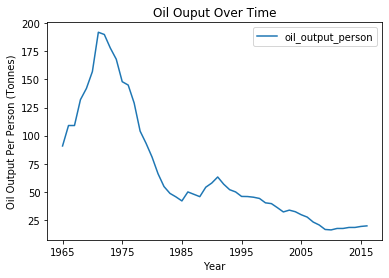

In [36]:
uae_complete.plot(x='Year', y='oil_output_person', kind="line", title='Oil Ouput Over Time')
plt.ylabel('Oil Output Per Person (Tonnes)')

The UAE discovered oil in 1958 and sold its first exports in 1960. As we can see, around 10 years after the discovery of oil its production peaked, but has since dropped dramatically. There are likely several things going on here, 1) Early on the UAE likely had an incentive to max out production to bring the oil to market and establish its place as a global producer; 2) The price of oil has likely gone up since the UAE began producing meaning they now have to produce less to maintain a consistent profit over time, and; 3) This data measures oil output by number of inhabitants in the country. If production per person decreases significantly over time, this likely indicates that the UAE's population has increased. A later graph will examine these two variables together. 

Text(0, 0.5, 'Income By Person (International USD)')

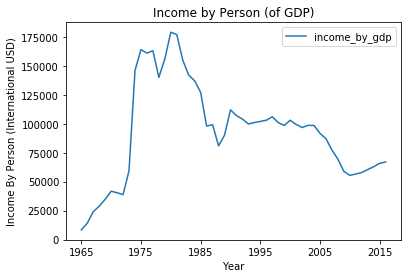

In [38]:
uae_complete.plot(x='Year', y='income_by_gdp', kind="line", title='Income by Person (of GDP)')
plt.ylabel('Income By Person (International USD)')

Income per person as a share of GDP seems to follow a similar, though not exact, trajectory to oil production. Once the country began producing oil the overall wealth of the population seems to have increased. This number began to fall over time. Again, this may be another indication that immigration of foreigners into the country causes the line in this graph to drop. When the UAE discovered oil, it was mostly a beduoin society and the profits from that oil would have initially benefited the Emiratis who made up most of the population. As the country began to grow and it needed to import the vast majority of its white collar and blue collar labor, we would expect the overall income of individuals to drop as there are more people (foreigners at 90% of the population) who are not being directly subsidized by oil profits (Emiratis at 10% today). In other words, the subsidized population (Emiratis) began to decrease relative to the unsubsidized population (foreign workers) whose income is tied to their nationalities (Westerners get paid more than South Asians, for example). This is likely why income appears to flatten in this graph, when in reality income distribution is much more complicated in the UAE. 

Text(0, 0.5, 'Population Percent Increase')

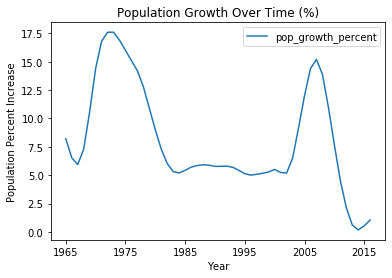

In [39]:
uae_complete.plot(x='Year', y='pop_growth_percent', kind="line", title='Population Growth Over Time (%)')
plt.ylabel('Population Percent Increase')

Population growth in the UAE shows an interesting trend. We see an initial spike around the time that oil begins to peak, and then a similar drop. However, around the year 2000 the population begins to spike again, before experiencing a an even bigger drop. This suggests two things, the UAE likely began importing foreign labor soon after it began drilling for oil. We can't tell from the data we have but the largest labor groups in the UAE are brought in to do manual work, primarily construction. What this graph might suggest is cheap labor was brought in to help build oil infrastructure, then emigration from these communities saw the total population growth drop. However, around the year 2000, Dubai as a city began to expand significantly. Dubai is largely known for its massive sky rises and luxurious consumer lifestyle. As the city expanded, a new group of laborers from Asia were likely brought in at this time to not only build the city, but to staff the service sector. It is also well known in the UAE that after the financial crash that caused the Great Recession in 2008, many of these labors went back to their home countries. While the initial spike in growth likely correlates with the increased production of oil and its related infratructure, subsequent increases and drops are more likely related to economic factors. 

Text(0, 0.5, 'Life Expectancy (Years)')

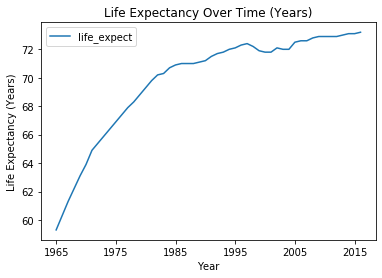

In [40]:
uae_complete.plot(x='Year', y='life_expect', kind="line", title='Life Expectancy Over Time (Years)')
plt.ylabel('Life Expectancy (Years)')

Life expectancy increased relatively significantly once the country began producing oil. There is likely a correlation here as oil production is responsible for the country's wealth and subsequent ability to develop. Generally speaking, better infrastructure, investment in public services, attraction of skilled workers (nurses, doctors, etc), increased trade and access to markets (modern medicines, foods, health and wellness services) etc, all increase life expectancy. While the correlation between oil and life expectancy is indirect, there is likely a linkage that is worth examining if the right data is available. 

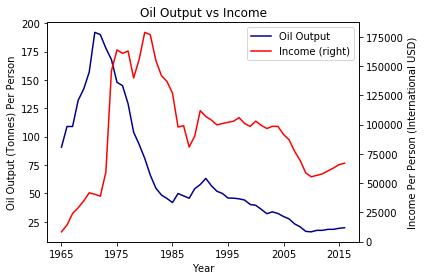

In [42]:
ax=uae_complete.plot(kind='line', x='Year', y='oil_output_person', label = 'Oil Output', color='DarkBlue', title='Oil Output vs Income')

ax2=uae_complete.plot(kind='line', x='Year', y='income_by_gdp', label = 'Income', secondary_y=True,color='Red', ax=ax)

ax.set_ylabel('Oil Output (Tonnes) Per Person')
ax2.set_ylabel('Income Per Person (International USD)')
plt.tight_layout()
plt.show()

When plotting oil output alongside income, we see a positive correlation between the two. In fact we see similar, if slightly delayed, rises and falls in income following rises and falls in oil output. In my comments on the oil output graph above, I suggested that maybe the fall in oil output (measured tonnes/person)may indicate an increase in the UAE's overall population. While that still may be true, we don't have the data to say for sure, these two graphs together would indicate that income still increased when there were marginal increases in production regardless. 

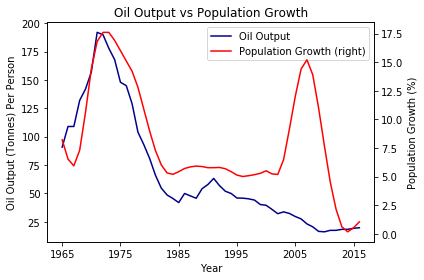

In [43]:
ax=uae_complete.plot(kind='line', x='Year', y='oil_output_person', label = 'Oil Output', color='DarkBlue', title='Oil Output vs Population Growth')

ax2=uae_complete.plot(kind='line', x='Year', y='pop_growth_percent', label = 'Population Growth', secondary_y=True,color='Red', ax=ax)

ax.set_ylabel('Oil Output (Tonnes) Per Person')
ax2.set_ylabel('Population Growth (%)')
plt.tight_layout()
plt.show()

When comparing oil output to population growth we see a positive correlation in the first half of the graph and a negative correlation in the second half. This likely indicates that my assessment of the population growth graph above is correct, where population growth increased after the UAE discovered oil and needed foreign workers to build the associated infrastructure. The second spike in population growth, again, likely coincides with the expansion of infrastructure and services to build a modern consumer economy, primarily in Dubai which doesn't have oil, that required more foreign labor. Its subsequent drop coincides with the Great Recession, its safe to assume this was the cause; however, without specific immigration data we can't say with 100% certainty that oil output correlates with this drop. 

<Figure size 1440x1440 with 0 Axes>

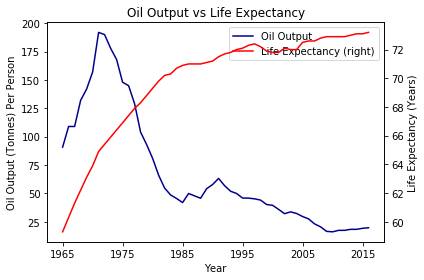

In [44]:
fig = plt.gcf()
fig.set_size_inches(20, 20)

ax=uae_complete.plot(kind='line', x='Year', y='oil_output_person', label = 'Oil Output', color='DarkBlue', title='Oil Output vs Life Expectancy')

ax2=uae_complete.plot(kind='line', x='Year', y='life_expect', label = 'Life Expectancy', secondary_y=True,color='Red', ax=ax)

ax.set_ylabel('Oil Output (Tonnes) Per Person')
ax2.set_ylabel('Life Expectancy (Years)')
plt.tight_layout()
plt.show()

Oil output and life expectancy are negatively correlated throughout the time period examined. However, it may not make a lot of sense to compare these two measures for reasons I mentioned above. Since the oil output data is measured in tonnes produced per person, as the population increases the line on the graph will likely trend downward. This would give the appearance of a negative correlation when, in fact we know that oil production is directly responsible for the development of a modern state and modern consumer economy in the UAE. We can assume that increases in all of the quality of life indicators would correlate to increased life expectancy as well. This will be look at in further detail in the next section. 

*Note - despite trying to move the legend to a better location I could not remove the old legend, and all code tried only moved the legend for the red line. 

### Research Question 2: What, if any, correllations exist between independent variables and do they provide insights not found when comparing the independent and dependent variables
  

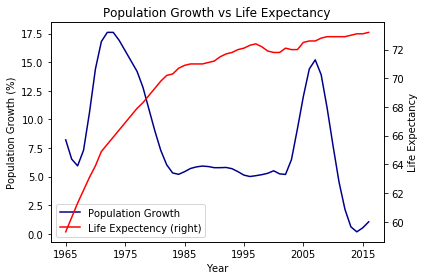

In [45]:
ax=uae_complete.plot(kind='line', x='Year', y='pop_growth_percent', color='DarkBlue', title='Population Growth vs Life Expectancy', label = 'Population Growth')

ax2=uae_complete.plot(kind='line', x='Year', y='life_expect', label = 'Life Expectency', secondary_y=True,color='Red', ax=ax)

ax2.set_ylabel('Life Expectancy')
ax.set_ylabel('Population Growth (%)')

plt.tight_layout()
plt.show()

It does not appear that we can gleen much when comparing population growth to life expectancy. We could assume that population and life expectancy correlate positively over time as, generally speaking, populations grow as counrtries modernize and life expectancy increases. However, given the UAE relies so much on foreign labor as a percentage of its population, comparing these two metrics might otherwise indicate some sort of mass population change like forced population transfers, ethnic cleansing/genocide, or some other massive loss of life. We know this is not the case. 

*Note - despite trying to move the legend to a better location I could not remove the old legend, and all code tried only moved the legend for the red line.

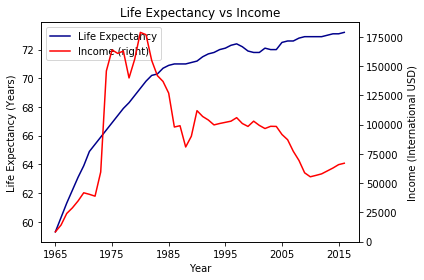

In [48]:
ax=uae_complete.plot(kind='line', x='Year', y='life_expect', label = 'Life Expectancy', color='DarkBlue', title='Life Expectancy vs Income')

ax2=uae_complete.plot(kind='line', x='Year', y='income_by_gdp', label = 'Income', secondary_y=True,color='Red', ax=ax)

ax.set_ylabel('Life Expectancy (Years)')
ax2.set_ylabel('Income (International USD)')

plt.tight_layout()
plt.show()

Again, the correlations between these two data sets are bit strange. While both correlate positively around the time oil was discovered, indeed the steepest point in the life expectancy curve correlates to the highest income levels, life expectancy continued to increase while incomes decreased. The income line may be subject to the same forces as the oil production (tonnes/person) line, where as the population increases this line would be expected to level off or decrease due to increasing numbers of foreign workers entering the country at different periods. 

*Note - despite trying to move the legend to a better location I could not remove the old legend, and all code tried only moved the legend for the red line.

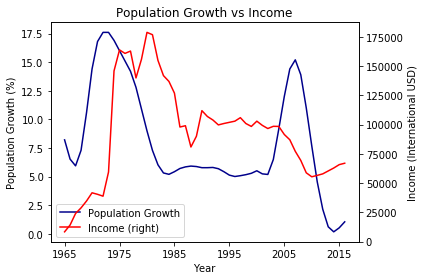

In [49]:
ax=uae_complete.plot(kind='line', x='Year', y='pop_growth_percent', label = 'Population Growth', color='DarkBlue', title='Population Growth vs Income')

ax2=uae_complete.plot(kind='line', x='Year', y='income_by_gdp', label = 'Income', secondary_y=True,color='Red', ax=ax)

ax.set_ylabel('Population Growth (%)')
ax2.set_ylabel('Income (International USD)')
plt.tight_layout()
plt.show()

When comparing population growth to income by GDP per person we would expect them to more or less correlate as they do above. When oil was first discovered, the industry generated lots of economic activity and likely attracted tons of foreign labor so we would expect both metrics to increase significantly. We would expect income to also slowly decline as populations increase over time as well, as seen in the early 2000s. Due to the limitations of the data, it is unclear if the income line increased significantly as we might expect following the crash in 2008 and the subsequent departure of large portions of the foriegn worker community. 

*Note - despite trying to move the legend to a better location I could not remove the old legend, and all code tried only moved the legend for the red line.

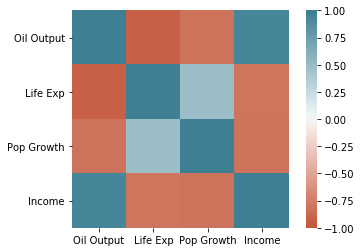

In [53]:
import seaborn as sns
data = uae_complete

Index= ['Oil Output', 'Life Exp', 'Pop Growth', 'Income']
Cols = ['Oil Output', 'Life Exp', 'Pop Growth', 'Income']
uae_complete = pd.DataFrame(abs(np.random.randn(4, 4)), index=Index, columns=Cols)
uae_complete.style.background_gradient(cmap='Greens')

corr = data.corr()
sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

The heatmap shows the correlation between each of the datasets. Our findings above are accurately reflected here, though the heatmap doesn't necessarily provide the nuance needed to understand the negative correlation between say oil output and life expectancy or population growth and income. Again, as described above these negative correlations are more an issue of quirks in how the UAE economy developed, and how the data we have is measured, rather than actual disparities in increasing quality of life and development indicators. 


# Conclusions


## Summary

### Oil Production Impact on Development Indicators

The UAE is in a unique situation in terms of its overall development. Its development has clearly been fueled by its vast oil resources, its unique geographic position, and its small local population. However the data examined in this project provided some interesting insights into the how effective oil revenues were in impacting the dependent variables over time. We can at least understand the following:

1. Oil likely serves as the basis for income by GDP per person even as production slows over time. Again, the drop in oil production also likely indicates an increase in population, as well as the diversification of the Emirati economy, but it is likely safe to say that oil acts like a "floor" or constant in supporting the countries development indicators, including many not examined in this project. 

2. Oil production also clearly impacted population growth up until the UAE economy began to diversify into a consumer and tourism heavy economy. This is not super clear just based on the UAE and oil data alone as these assumptions are being drawn from knowledge and context gained from living here. Furthermore, the UAE a bit of an outlier in terms of its development, so the population swings when compared to any other data set will likely look strange and be difficult to explain.

3. The steepest growth in life expectancy correlated to the peak of initial oil production. Again, while this linkage isn't necessarily evident on face, when considered alongside a basic understanding of economics and development it makes sense that significant increases in GDP and the production of a valuable resource would result in greater investment in infrastructure, public health, and public services. It takes money to invest in your people, and when done correctly it is likely that life expectancy will go up. 

4. When comparing independent variables to each other we get a better idea of how the UAE's unique situation can skew our understanding of the data. While population fluctuates drastically, life expectancy goes up. There are few events in the world that would help an analyst make sense of this data without a sound understanding of the environment from which that data is taken. Similarly, income appears to continue dropping despite fluctuations in population. We do not have enough data to truly understand if mass population loss would increase overall income, so comparing these data on face would again be confusing to an outsider. Finally, when controlling for income data likely decreasing due to increasing population, we can see how a negative correlation between life expectancy and income may make sense, but, again, just examining these metrics together does not necessarily provide all the information needed to draw that conclusion. 

### Limitations

There were several instances where additional data could have provided more clarity on how each of these development measures really operate in the real world. The limitations of these data prevent us from drawing hard conclusions on anything, but it does reveal the following:

1. Immigration/emmigration data would give us a better understanding of when/where the foreign workers were coming from and going to. Since income is tied to a worker's nationality, we could have better controlled for drops in incomes that may simply be tied to demographic changes. 

2. The oil data was inherently limited because the data only tied production back to the number of UAE residents. Furthermore, the data was unclear as to whether production continues to decline due to pricing, limitations in global demand and supply, or any other economic indicator whether local or international. Additional data may have helped explain this. 

3. Lastly, additional life expectancy data, rather than just raw age data, could have helped us further examine why life expectancy continued increasing while other metrics fluctuated so much. While the data makes it appear that the initial increase in life expectancy was likely related to oil production and its associated revenue streams, we cannot say for sure. Additional information on state investements or access to healthcare, eating habits, and rates of sickness may have complimented this data and our findings.